In [30]:
#Pemanggilan Library
import pandas as pd
import numpy as np
from  matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [31]:
#Pemanggilan Dataset
dt = pd.read_csv("data_tugas_akhir.csv",sep=',')
data = pd.DataFrame(dt)
#X_Data = data[['Jenis_Kelamin','IPS1','IPS2','IPS3','IPS4','IPS5']]
#Y_Target = data['Status']
X_Data = data.iloc[:,2:9]
Y_Target = data.iloc[:,-1]
X_Data

,Jenis_Kelamin,IPS1,IPS2,IPS3,IPS4,IPS5,IPK
0,L,2.55,2.52,2.87,2.93,2.99,3.02
1,P,3.16,3.10,3.27,3.29,3.33,3.35
2,L,2.01,2.12,2.22,2.40,2.51,2.64
3,L,1.62,1.70,1.86,2.01,2.14,2.41
4,L,2.94,2.86,3.04,3.17,3.19,3.20
...,...,...,...,...,...,...,...
297,L,2.78,1.90,2.44,2.41,2.47,2.40
298,L,2.94,1.71,2.00,2.63,2.87,2.43
299,L,2.56,2.00,2.44,2.39,2.68,2.42
300,L,2.69,1.85,2.06,2.06,2.50,2.23


In [3]:
Y_Target

0      TIDAK TEPAT WAKTU
1            TEPAT WAKTU
2      TIDAK TEPAT WAKTU
3      TIDAK TEPAT WAKTU
4      TIDAK TEPAT WAKTU
             ...        
297    TIDAK TEPAT WAKTU
298    TIDAK TEPAT WAKTU
299    TIDAK TEPAT WAKTU
300    TIDAK TEPAT WAKTU
301    TIDAK TEPAT WAKTU
Name: Status, Length: 302, dtype: object

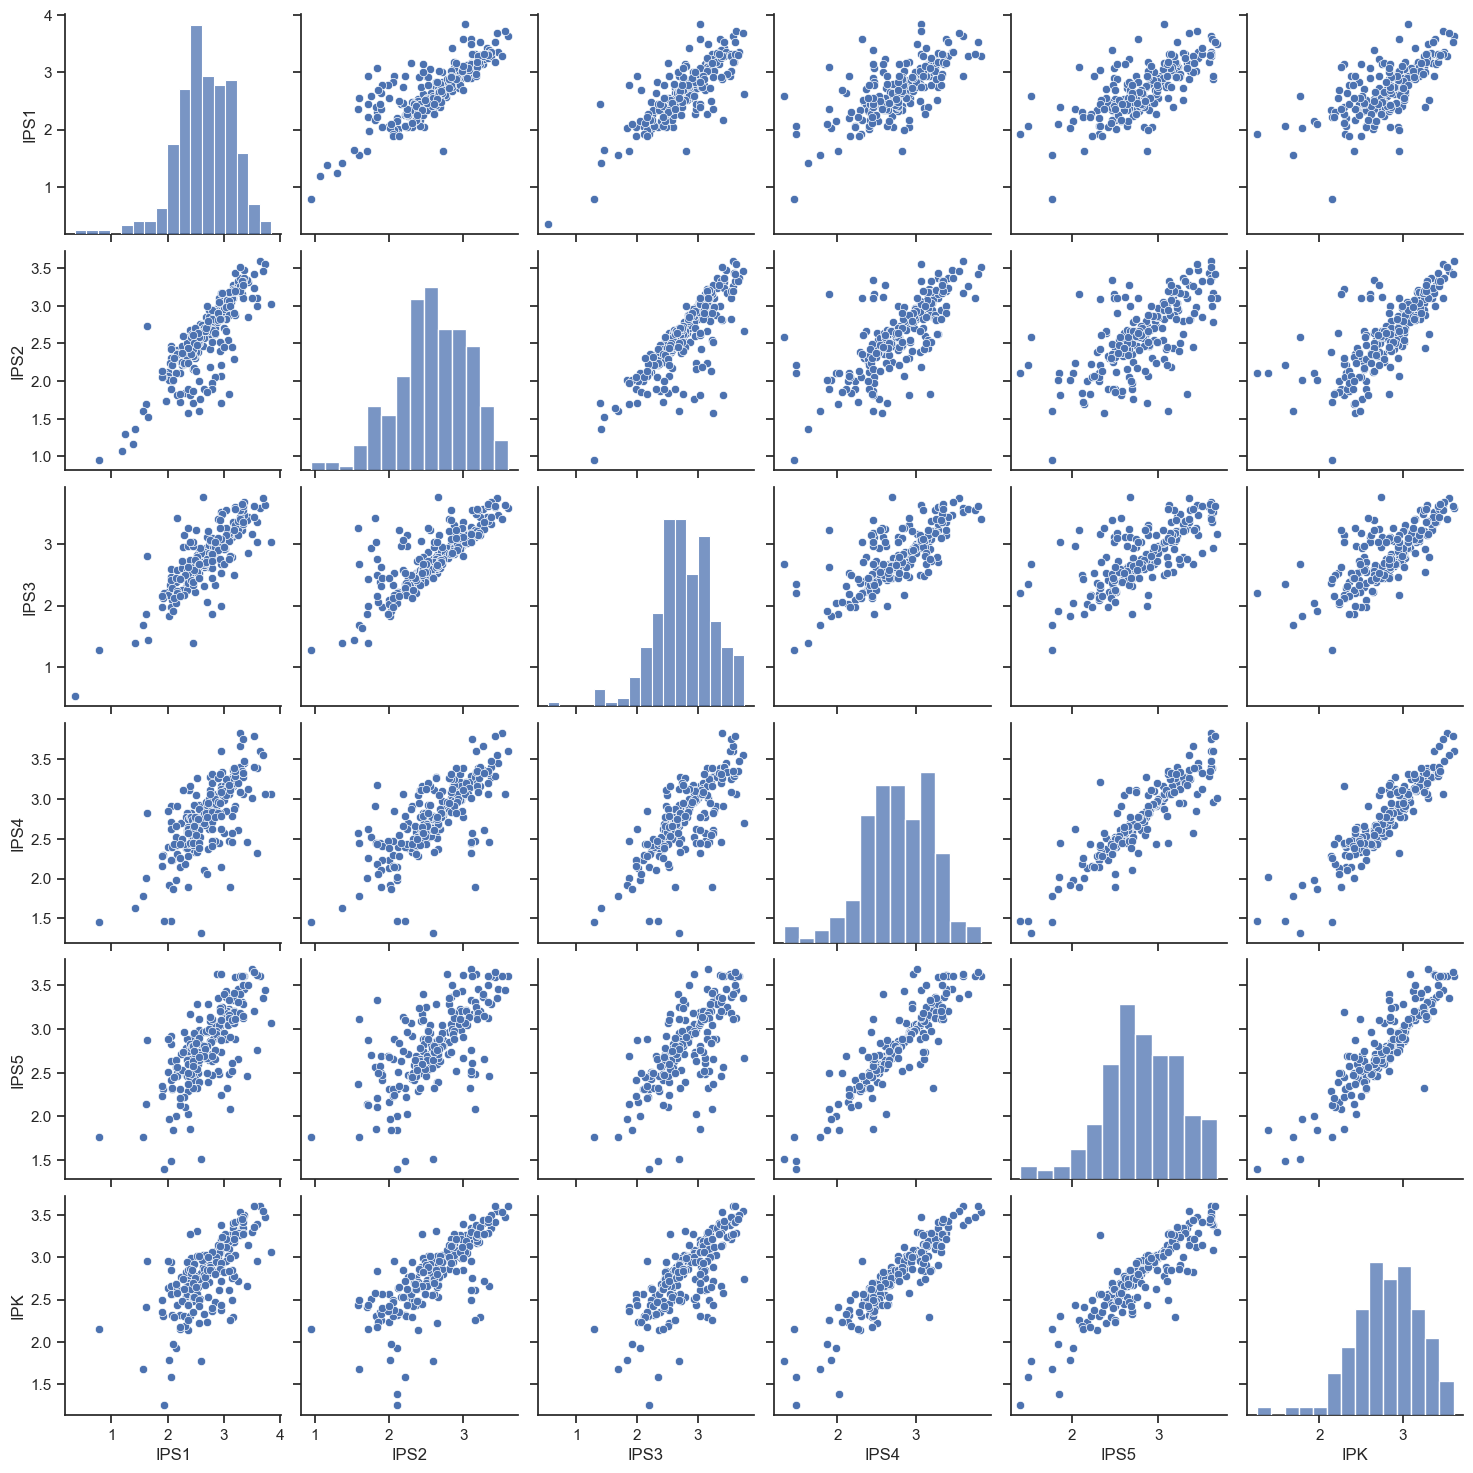

In [4]:
import seaborn as sns

sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data[['IPS1','IPS2','IPS3','IPS4','IPS5','IPK']])
plt.show()

# Melihat Informasi Data Statistik Data Kelulusan 

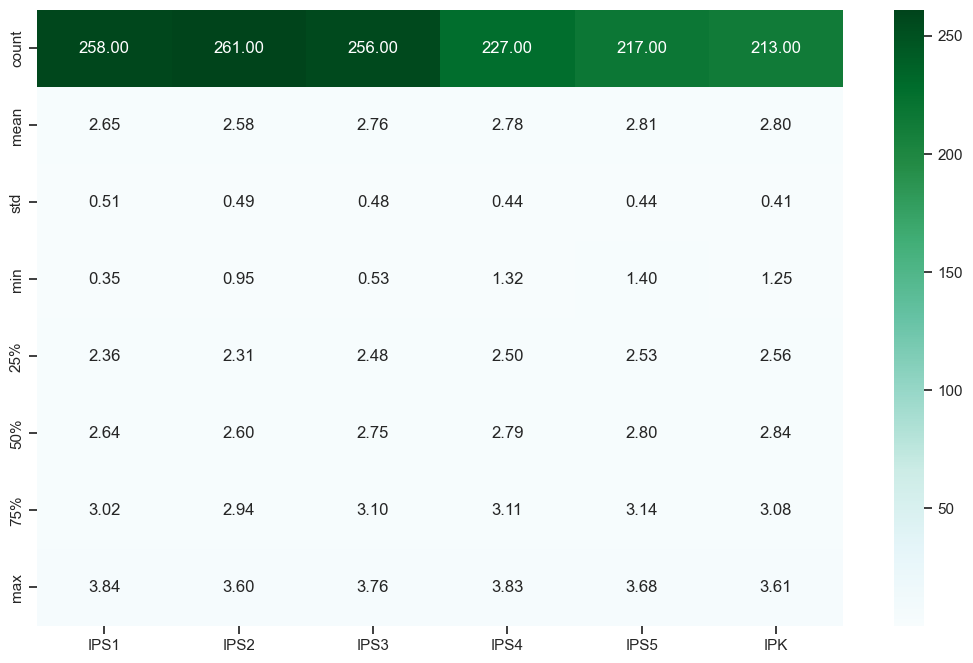

In [11]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(13, 8))
sns.heatmap(data[['IPS1','IPS2','IPS3','IPS4','IPS5','IPK']].describe(), annot=True, fmt=".2f", cmap='BuGn')
plt.show()

# Korelasi Antar Atribut

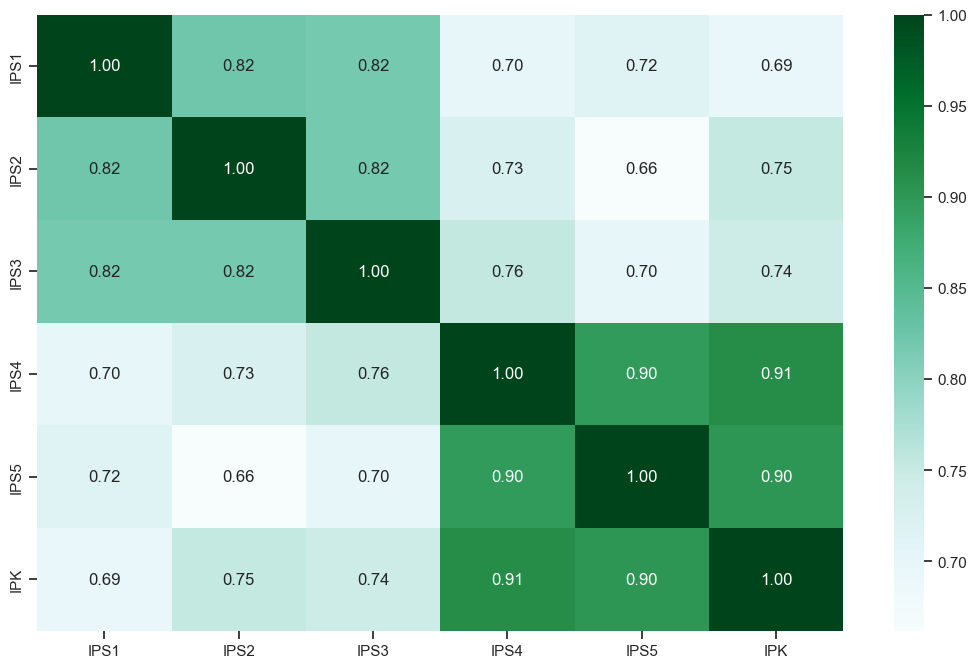

In [8]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(13, 8))
sns.heatmap(X_Data.corr(), annot=True, fmt=".2f", cmap='BuGn')
plt.show()

# Melihat Type Data Masing-Masing Atribut

In [12]:
data.dtypes

No                 int64
Nim                int64
Jenis_Kelamin     object
IPS1             float64
IPS2             float64
IPS3             float64
IPS4             float64
IPS5             float64
IPK              float64
Status            object
dtype: object

# Melihat Informasi Data

In [13]:
X_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Jenis_Kelamin  302 non-null    object 
 1   IPS1           258 non-null    float64
 2   IPS2           261 non-null    float64
 3   IPS3           256 non-null    float64
 4   IPS4           227 non-null    float64
 5   IPS5           217 non-null    float64
 6   IPK            213 non-null    float64
dtypes: float64(6), object(1)
memory usage: 16.6+ KB


# Melihat Distribusi Lulus Tepat Waktu dan Tidak

In [14]:
print(data.Status.value_counts())

TIDAK TEPAT WAKTU    224
TEPAT WAKTU           78
Name: Status, dtype: int64


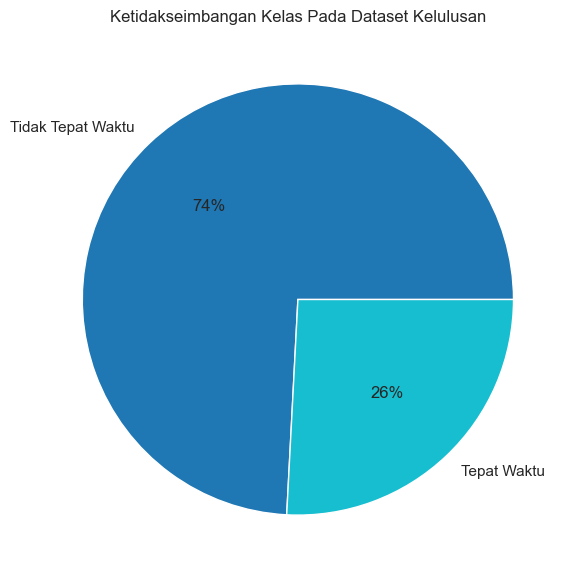

In [15]:
colors = ['tab:blue', 'tab:cyan']
label=['Tidak Tepat Waktu','Tepat Waktu']

fig, ax = plt.subplots(figsize=(10, 7))
ax.pie(data.Status.value_counts(), labels=label, colors = colors, autopct='%.0f%%')
ax.set_title('Ketidakseimbangan Kelas Pada Dataset Kelulusan')
plt.show()

# #Mengecek Adanya Missing Values

In [32]:
data.isnull().sum()

No                0
Nim               0
Jenis_Kelamin     0
IPS1             44
IPS2             41
IPS3             46
IPS4             75
IPS5             85
IPK              89
Status            0
dtype: int64

# Jumlah Baris yang terdapat Missing Value

In [33]:
data.shape[0] - data.dropna().shape[0]

96

In [34]:
# Tampilkan data yang missing values
data[data.isnull().any(axis=1)]

,No,Nim,Jenis_Kelamin,IPS1,IPS2,IPS3,IPS4,IPS5,IPK,Status
28,29,1010510074,L,NaN,2.40,2.54,2.49,2.55,2.7,TIDAK TEPAT WAKTU
51,52,1010520145,L,2.31,2.31,2.48,NaN,NaN,NaN,TIDAK TEPAT WAKTU
52,53,1010520148,L,3.05,2.96,3.05,NaN,NaN,NaN,TIDAK TEPAT WAKTU
53,54,1010520151,P,2.90,2.98,2.97,NaN,NaN,NaN,TIDAK TEPAT WAKTU
54,55,1010520158,L,2.73,2.94,2.98,NaN,NaN,NaN,TIDAK TEPAT WAKTU
...,...,...,...,...,...,...,...,...,...,...
214,215,910530264,L,NaN,NaN,NaN,NaN,NaN,NaN,TEPAT WAKTU
215,216,910530269,L,1.18,1.07,NaN,NaN,NaN,NaN,TIDAK TEPAT WAKTU
217,218,910530273,L,NaN,1.64,1.64,NaN,NaN,NaN,TIDAK TEPAT WAKTU
218,219,910530276,L,NaN,NaN,NaN,NaN,NaN,NaN,TIDAK TEPAT WAKTU


# Cek Data Duplikat

In [35]:
# Cek jumlah data duplikat
data.duplicated().sum()

0

In [36]:
# tampilkan Data Duplikat
data[data.duplicated(keep = False)]

,No,Nim,Jenis_Kelamin,IPS1,IPS2,IPS3,IPS4,IPS5,IPK,Status


# # Konversi tipe data nominal ke tipe numerik pada atribut Jenis Kelamin<br>
1. L = 0,
2. P = 1

In [37]:
#from sklearn.preprocessing import LabelEncoder
#labelencoder_jk = LabelEncoder()
#X_Data['Jenis_Kelamin'] = labelencoder_jk.fit_transform(X_Data['Jenis_Kelamin']).astype("int64")
#X_Data.head()

konversi_JK = {"Jenis_Kelamin":     {'L': 1, 'P': 2}}

In [38]:
data = data.replace(konversi_JK)
data.head()

,No,Nim,Jenis_Kelamin,IPS1,IPS2,IPS3,IPS4,IPS5,IPK,Status
0,1,1010510001,1,2.55,2.52,2.87,2.93,2.99,3.02,TIDAK TEPAT WAKTU
1,2,1010510002,2,3.16,3.10,3.27,3.29,3.33,3.35,TEPAT WAKTU
2,3,1010510003,1,2.01,2.12,2.22,2.40,2.51,2.64,TIDAK TEPAT WAKTU
3,4,1010510006,1,1.62,1.70,1.86,2.01,2.14,2.41,TIDAK TEPAT WAKTU
4,5,1010510011,1,2.94,2.86,3.04,3.17,3.19,3.20,TIDAK TEPAT WAKTU


In [39]:
X_Data = data.iloc[:,2:9]
Y_Target = data.iloc[:,-1]
X_Data

,Jenis_Kelamin,IPS1,IPS2,IPS3,IPS4,IPS5,IPK
0,1,2.55,2.52,2.87,2.93,2.99,3.02
1,2,3.16,3.10,3.27,3.29,3.33,3.35
2,1,2.01,2.12,2.22,2.40,2.51,2.64
3,1,1.62,1.70,1.86,2.01,2.14,2.41
4,1,2.94,2.86,3.04,3.17,3.19,3.20
...,...,...,...,...,...,...,...
297,1,2.78,1.90,2.44,2.41,2.47,2.40
298,1,2.94,1.71,2.00,2.63,2.87,2.43
299,1,2.56,2.00,2.44,2.39,2.68,2.42
300,1,2.69,1.85,2.06,2.06,2.50,2.23


In [40]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(missing_values=np.nan,n_neighbors=5)
X_Data=imputer.fit_transform(X_Data.iloc[:,0:7])
X_Data = pd.DataFrame(X_Data, columns=['Jenis_Kelamin','IPS1','IPS2','IPS3','IPS4','IPS5','IPK'])
X_Data

,Jenis_Kelamin,IPS1,IPS2,IPS3,IPS4,IPS5,IPK
0,1.0,2.55,2.52,2.87,2.93,2.99,3.02
1,2.0,3.16,3.10,3.27,3.29,3.33,3.35
2,1.0,2.01,2.12,2.22,2.40,2.51,2.64
3,1.0,1.62,1.70,1.86,2.01,2.14,2.41
4,1.0,2.94,2.86,3.04,3.17,3.19,3.20
...,...,...,...,...,...,...,...
297,1.0,2.78,1.90,2.44,2.41,2.47,2.40
298,1.0,2.94,1.71,2.00,2.63,2.87,2.43
299,1.0,2.56,2.00,2.44,2.39,2.68,2.42
300,1.0,2.69,1.85,2.06,2.06,2.50,2.23


In [41]:
X_Data.isna().sum()

Jenis_Kelamin    0
IPS1             0
IPS2             0
IPS3             0
IPS4             0
IPS5             0
IPK              0
dtype: int64

# # Melakukan Penyeimbangan Data Dengan SMOTE-ENN

In [42]:
from imblearn.combine import SMOTETomek, SMOTEENN
SE = SMOTEENN()
x_se, y_se = SE.fit_resample(X_Data, Y_Target)
print(' Data Sebelum dilakukan Hyrib Sampling SMOTE-ENN \n', Y_Target.value_counts())
print('Hasil Hybrid Samling SMOTE-ENN pada Dataset \n', y_se.value_counts())

 Data Sebelum dilakukan Hyrib Sampling SMOTE-ENN 
 TIDAK TEPAT WAKTU    224
TEPAT WAKTU           78
Name: Status, dtype: int64
Hasil Hybrid Samling SMOTE-ENN pada Dataset 
 TEPAT WAKTU          132
TIDAK TEPAT WAKTU    113
Name: Status, dtype: int64


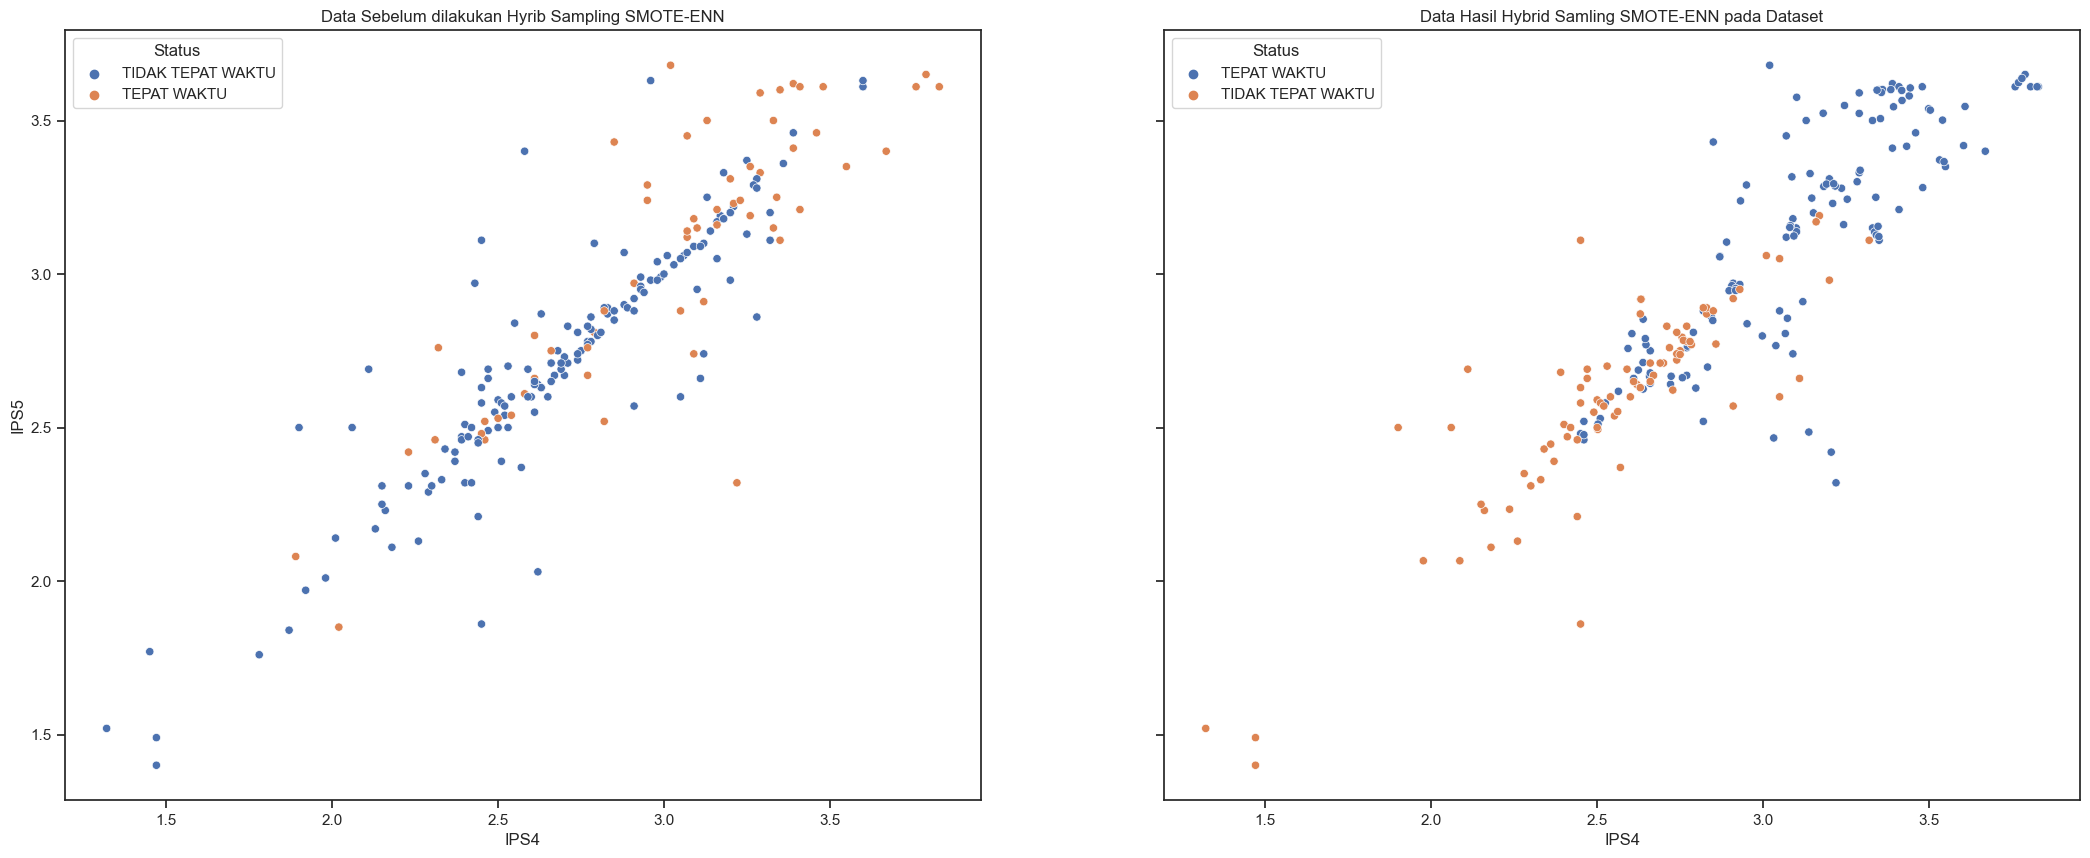

In [43]:
fig, ax = plt.subplots(1,2, figsize=(26,10), sharey=True)

#Data Sebelum dilakukan Hyrib Sampling SMOTE-ENN
sns.scatterplot(ax = ax[0], x = data['IPS4'], y = data['IPS5'], hue = Y_Target )
ax[0].set_title("Data Sebelum dilakukan Hyrib Sampling SMOTE-ENN")

#Hasil Hybrid Samling SMOTE-ENN pada Dataset
sns.scatterplot(ax = ax[1], x = x_se['IPS4'], y = x_se['IPS5'], hue = y_se)
ax[1].set_title("Data Hasil Hybrid Samling SMOTE-ENN pada Dataset")

plt.show()

# Pembagian Data Training 80% dan Testing 20% Menggunakan Data Spliting

In [44]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

In [45]:
print("Data yang sudah Imbang")
x_train, x_test, y_train, y_test = train_test_split(x_se, y_se, test_size=0.2, random_state=0)
print(x_train)

Data yang sudah Imbang
     Jenis_Kelamin      IPS1      IPS2      IPS3      IPS4      IPS5       IPK
15             1.0  3.500000  3.100000  3.160000  3.020000  3.680000  3.300000
158            1.0  2.240000  2.250000  2.450000  2.700000  2.710000  2.770000
7              2.0  3.400000  3.340000  3.380000  2.460000  2.460000  2.660000
159            2.0  2.260000  2.260000  2.440000  2.552000  2.538000  2.524000
207            1.0  2.298000  2.516000  2.402000  2.632000  2.918000  2.692000
..             ...       ...       ...       ...       ...       ...       ...
67             1.0  3.376294  3.267367  3.487456  3.245581  3.549018  3.387322
192            1.0  2.298000  2.516000  2.402000  2.632000  2.918000  2.692000
117            1.0  3.368284  3.435717  3.453143  3.433031  3.416118  3.398574
47             1.0  3.264470  3.267296  3.456821  3.146943  3.247296  3.275530
172            2.0  2.060000  2.420000  2.420000  2.630000  2.630000  2.660000

[196 rows x 7 columns]


# Melakukan Tuning parameter pada Metode SVM

In [46]:
print("Tuning Parameter metode SVM pada Data Seimbang")
kernel_ds = ['linear','sigmoid','rbf','poly']
ker_ds = []
acc_ds = []

for i in kernel_ds:
  import pandas as pd
  from sklearn.model_selection import train_test_split
  from sklearn.svm import SVC
  from sklearn import metrics
    
    
  X_train, X_test, y_train, y_test = train_test_split(x_se, y_se, test_size = 0.2, random_state=0)

  svm_ds = SVC(
      kernel = i,
      C = 1,
      gamma = 0.5
  )

  svm_ds.fit(X_train, y_train)
  y_pred = svm_ds.predict(X_test)
  score = metrics.accuracy_score(y_test,y_pred)
  
  ker_ds.append(i)
  acc_ds.append(score)

  #print("Nilai Akurasi kernel",i," = ", score) 

dict = {
    'kernel' : ker_ds,
    'akurasi': acc_ds
}

ds = pd.DataFrame(dict)
ds.sort_values(by=['akurasi'], ascending=False)

Tuning Parameter metode SVM pada Data Seimbang


,kernel,akurasi
0,linear,0.938776
2,rbf,0.918367
3,poly,0.918367
1,sigmoid,0.551020


In [47]:
model = SVC(C=1,gamma=0.5,kernel ='rbf')
model.fit(x_train, y_train)

SVC(C=1, gamma=0.5)

In [48]:
y_pred_ds = model.predict(x_test)
y_pred_ds

array(['TEPAT WAKTU', 'TIDAK TEPAT WAKTU', 'TEPAT WAKTU', 'TEPAT WAKTU',
       'TIDAK TEPAT WAKTU', 'TIDAK TEPAT WAKTU', 'TIDAK TEPAT WAKTU',
       'TIDAK TEPAT WAKTU', 'TEPAT WAKTU', 'TEPAT WAKTU',
       'TIDAK TEPAT WAKTU', 'TEPAT WAKTU', 'TIDAK TEPAT WAKTU',
       'TIDAK TEPAT WAKTU', 'TIDAK TEPAT WAKTU', 'TIDAK TEPAT WAKTU',
       'TIDAK TEPAT WAKTU', 'TIDAK TEPAT WAKTU', 'TEPAT WAKTU',
       'TEPAT WAKTU', 'TEPAT WAKTU', 'TEPAT WAKTU', 'TEPAT WAKTU',
       'TIDAK TEPAT WAKTU', 'TEPAT WAKTU', 'TIDAK TEPAT WAKTU',
       'TEPAT WAKTU', 'TEPAT WAKTU', 'TIDAK TEPAT WAKTU',
       'TIDAK TEPAT WAKTU', 'TEPAT WAKTU', 'TIDAK TEPAT WAKTU',
       'TIDAK TEPAT WAKTU', 'TEPAT WAKTU', 'TEPAT WAKTU', 'TEPAT WAKTU',
       'TIDAK TEPAT WAKTU', 'TIDAK TEPAT WAKTU', 'TIDAK TEPAT WAKTU',
       'TIDAK TEPAT WAKTU', 'TEPAT WAKTU', 'TIDAK TEPAT WAKTU',
       'TIDAK TEPAT WAKTU', 'TIDAK TEPAT WAKTU', 'TEPAT WAKTU',
       'TIDAK TEPAT WAKTU', 'TEPAT WAKTU', 'TEPAT WAKTU', 'TEPAT WAKTU'],
   

# Uji Performa Metode SVM Menggunakan Confusion Matriks

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt     
from sklearn.metrics import confusion_matrix

cm_ds = confusion_matrix(y_test, y_pred_ds)
fig, ax = plt.subplots(figsize=(11, 7))
sns.heatmap(cm_ds, annot=True, ax = ax); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title(' Performa Metode SVM pada Data Seimbang dengan Confusion matrik'); 
ax.xaxis.set_ticklabels(['Tepat Waktu', 'Tidak Tepat Waktu']); ax.yaxis.set_ticklabels([ 'Tepat Waktu','Tidak Tepat Waktu']);

print(" Data Yang Seimbang")
TP = cm_ds[0, 0]
TN = cm_ds[1, 1]
FP = cm_ds[1, 0]
FN = cm_ds[0, 1]
print('True Positive',TP)
print('True Negative',TN)
print('False Positive',FP)
print('False Negative',FN)

akurasi = round((TP+TN) / float(TP+FN +TN+FP),4)*100
print("Akurasi SVM = ",akurasi)

sensitivity = round(TP / float(FN + TP),4)*100
print("Sensitivitas atau Recall SVM =",sensitivity)

specificity = round(TN / float(TN + FP),4)*100
print("Spesifisitas SVM = ",specificity)

 Data Yang Seimbang
True Positive 23
True Negative 22
False Positive 0
False Negative 4
Akurasi SVM =  91.84
Sensitivitas atau Recall SVM = 85.19
Spesifisitas SVM =  100.0


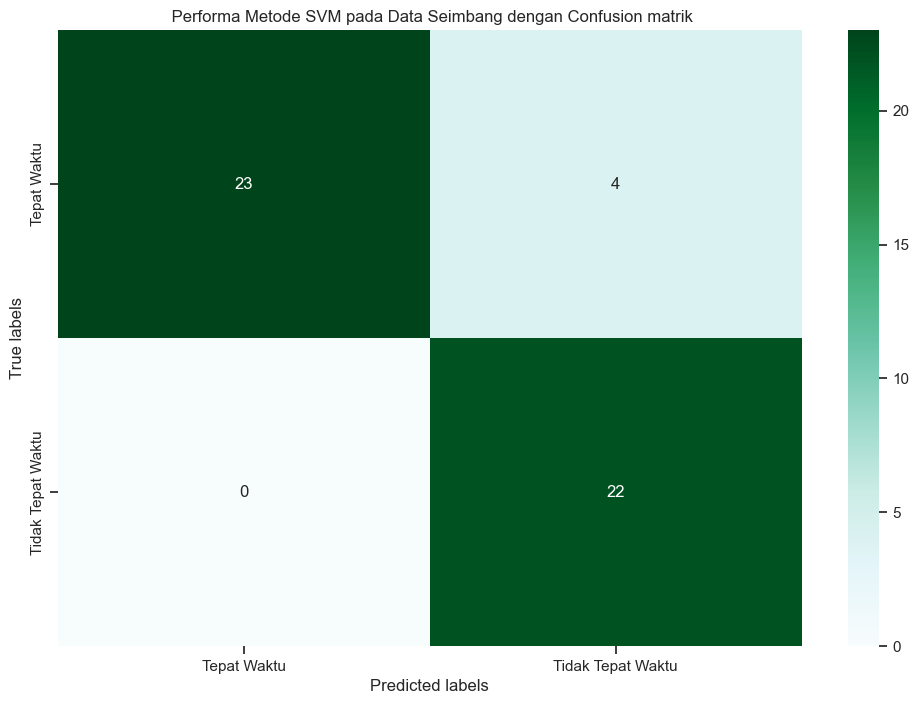

In [51]:
fig,ax = plt.subplots(figsize=(12, 8))
sns.heatmap(cm_ds, annot=True, fmt='g',cmap='BuGn'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title(' Performa Metode SVM pada Data Seimbang dengan Confusion matrik'); 
ax.xaxis.set_ticklabels(['Tepat Waktu', 'Tidak Tepat Waktu']); ax.yaxis.set_ticklabels([ 'Tepat Waktu','Tidak Tepat Waktu']);
plt.show()

# Perbandingan Kinerja metode SVM

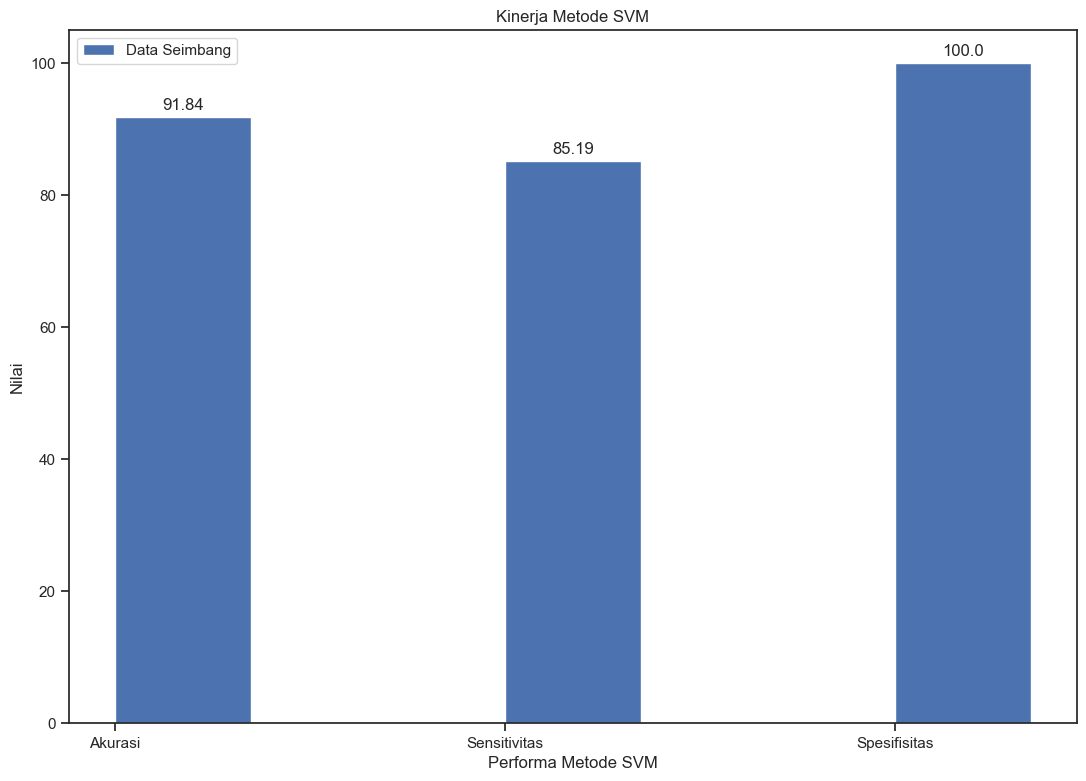

In [52]:
import matplotlib.pyplot as plt

# data to plot

labels = ['Akurasi', 'Sensitivitas', 'Spesifisitas']
kinerja_ds = [akurasi, sensitivity, specificity]

# create plot
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(13, 9))
rects2 = ax.bar(x + width/2, kinerja_ds, width, label='Data Seimbang')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Nilai')
ax.set_xlabel('Performa Metode SVM')
ax.set_title('Kinerja Metode SVM')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects2)

#fig.tight_layout()

plt.show()

# Validasi Hasil Kelas Aktual dengan Prediksi

In [53]:
df1 = pd.DataFrame({'Aktual':y_test,'Prediksi':y_pred_ds.flatten()})
df1

,Aktual,Prediksi
92,TEPAT WAKTU,TEPAT WAKTU
238,TIDAK TEPAT WAKTU,TIDAK TEPAT WAKTU
73,TEPAT WAKTU,TEPAT WAKTU
55,TEPAT WAKTU,TEPAT WAKTU
181,TIDAK TEPAT WAKTU,TIDAK TEPAT WAKTU
189,TIDAK TEPAT WAKTU,TIDAK TEPAT WAKTU
137,TIDAK TEPAT WAKTU,TIDAK TEPAT WAKTU
136,TIDAK TEPAT WAKTU,TIDAK TEPAT WAKTU
107,TEPAT WAKTU,TEPAT WAKTU
64,TEPAT WAKTU,TEPAT WAKTU


# Testing Data Baru

In [56]:
X = [[1,3.5,3.3,3.1,3.4,3.6,3.2]]

# Hasil Prediksi Data Testing

In [57]:
y_prediksi = model.predict(X)
print(y_prediksi)

['TEPAT WAKTU']


C:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


# Simpan Model yang Telah Dibangun

In [58]:
import pickle
pickle.dump(model, open('model_svm.pkl', 'wb'))

In [59]:
pickled_model = pickle.load(open('model_svm.pkl', 'rb'))
pickled_model.predict(X)

C:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array(['TEPAT WAKTU'], dtype=object)

# Simpan Data Hasil SMOTE-ENN

In [36]:
X = pd.DataFrame(x_se)
Y = pd.DataFrame(y_se)
Gabung = pd.concat([X,Y],axis=1)
Gabung

,Jenis_Kelamin,IPS1,IPS2,IPS3,IPS4,IPS5,Status
0,1.0,2.63,2.73,2.77,2.910,2.970,TEPAT WAKTU
1,2.0,3.09,2.95,3.20,3.210,3.230,TEPAT WAKTU
2,1.0,3.43,3.32,3.43,3.342,3.268,TEPAT WAKTU
3,1.0,2.57,2.76,2.84,2.930,2.966,TEPAT WAKTU
4,2.0,3.40,3.34,3.38,2.460,2.460,TEPAT WAKTU
...,...,...,...,...,...,...,...
234,2.0,2.78,1.98,1.87,2.470,2.690,TIDAK TEPAT WAKTU
235,1.0,2.78,1.90,2.44,2.410,2.470,TIDAK TEPAT WAKTU
236,1.0,2.94,1.71,2.00,2.630,2.870,TIDAK TEPAT WAKTU
237,1.0,2.56,2.00,2.44,2.390,2.680,TIDAK TEPAT WAKTU


In [37]:
Gabung.to_excel('data_kelulusan_Smote_ENN.xlsx', index=False)